In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import itertools as it
import warnings

from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression,LogisticRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, StackingRegressor, GradientBoostingRegressor, BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from pyearth import Earth

In [19]:
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('data/train.csv')
train.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5


In [3]:
test = pd.read_csv('data/test.csv')
test.head()

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x756,x757,x758,x759,x760,x761,x762,x763,x764,x765
0,5380,6.507826e+10,7882.15,6.82,0.00210,1.712586e+09,0.39,583617.74,862986.0,63872.0,...,0.0380,0.0010,90204869909,0.26,8.0,5,5.0,30.1213,27.95,-0.49
1,5381,3.122741e+09,4682.13,8.17,0.00010,1.040914e+09,0.00,190000.65,688710.0,35407.0,...,0.1866,0.0192,37449565014,0.02,16.0,1,8.0,2.1282,10.18,0.55
2,5382,3.888719e+10,7495.57,7.15,0.00285,2.160400e+09,0.42,351570.67,841523.0,170240.0,...,0.0100,0.0017,10847937619,0.83,35.0,1,19.0,7.8513,21.27,19.09
3,5383,7.727427e+10,4003.76,6.53,0.00165,5.519591e+09,0.00,320216.05,466131.0,35.0,...,0.4636,0.0000,37200096,0.51,1.0,4,0.0,9.0511,18.38,4.11
4,5384,4.184868e+09,34874.72,6.39,0.00065,1.046217e+09,0.50,3349978.53,3711028.0,1757.0,...,2.8737,0.0001,16400000000000,0.12,2.0,1,2.0,2.6512,149.68,0.02


In [4]:
train = train.fillna(0)
y_train = train['y']
X_train = train.drop(['y', 'id'], axis = 1)

In [5]:
corr = abs(train.corrwith(train['y']))
top_20 = corr.sort_values(ascending = False).head(21)[1:]
print(top_20)

x146    0.378696
x102    0.378436
x014    0.364737
x581    0.346598
x619    0.344101
x687    0.343842
x651    0.329630
x696    0.329630
x755    0.324916
x096    0.315185
x756    0.312320
x569    0.311497
x543    0.308728
x749    0.296195
x591    0.293075
x427    0.293073
x742    0.282411
x561    0.279915
x488    0.275807
x670    0.272551
dtype: float64


In [6]:
X_train = X_train[['x146', 'x102', 'x014', 'x581', 'x619', 'x687', 'x651', 'x696', 'x755', 'x096', 'x756',
                   'x569', 'x543', 'x749', 'x591', 'x427', 'x742', 'x561', 'x488', 'x670']]

In [7]:
X_test = test
col_id = test['id']
X_test = test.drop(['id'], axis = 1)
X_test = X_test[['x146', 'x102', 'x014', 'x581', 'x619', 'x687', 'x651', 'x696', 'x755', 'x096', 'x756',
                 'x569', 'x543', 'x749', 'x591', 'x427', 'x742', 'x561', 'x488', 'x670']]
X_test = X_test.fillna(0)

## MARS

In [46]:
model_MARS = Earth(max_terms = 400, max_degree = 4).fit(X_train, y_train)

## AdaBoost

>2 11.131 (0.420)
>3 11.787 (0.257)
>4 11.369 (0.270)
>5 11.540 (0.210)
>6 11.587 (0.269)
>7 11.869 (0.351)
>8 12.171 (0.538)
>9 12.239 (0.507)
>10 12.407 (0.537)


Text(0.5, 0, 'Number of trees')

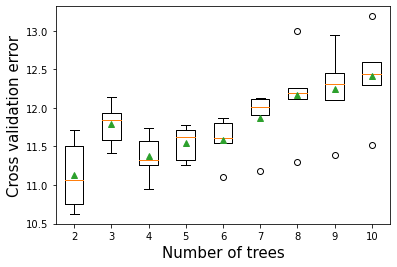

In [8]:
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    for n in n_trees:
        models[str(n)] = AdaBoostRegressor(n_estimators=n,random_state=1)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

# get the models to evaluate
models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

>1 12.623 (1.060)
>2 12.134 (0.817)
>3 13.933 (1.419)
>4 17.542 (1.691)
>5 15.045 (0.707)
>6 12.497 (0.869)
>7 11.608 (0.855)
>8 10.799 (1.113)
>9 10.558 (1.140)
>10 10.554 (1.214)
>11 10.408 (1.193)
>12 10.377 (1.248)
>13 10.471 (1.370)
>14 10.433 (1.181)
>15 10.495 (1.293)
>16 10.471 (1.232)
>17 10.549 (1.228)
>18 10.641 (1.181)
>19 10.619 (1.359)
>20 10.544 (1.266)


Text(0.5, 0, 'Depth of each tree')

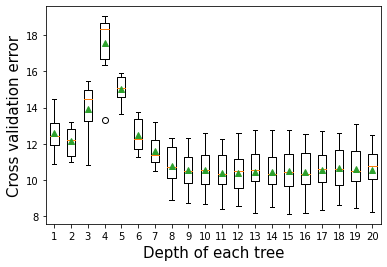

In [9]:
def get_models():
    models = dict()
    for i in range(1,21):
        base = DecisionTreeRegressor(max_depth=i)
        models[str(i)] = AdaBoostRegressor(base_estimator=base,n_estimators=50)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
# plot    
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

In [12]:
model = AdaBoostRegressor(random_state=1)
grid = dict()
grid['n_estimators'] = [3, 4, 5]
grid['base_estimator'] = [DecisionTreeRegressor(max_depth=5), DecisionTreeRegressor(max_depth=6), 
                          DecisionTreeRegressor(max_depth=7), DecisionTreeRegressor(max_depth=8)]

cv = KFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_squared_error')
grid_result = grid_search.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

Best: -114.255451 using {'base_estimator': DecisionTreeRegressor(max_depth=6), 'n_estimators': 4}


In [13]:
model_ADA = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),n_estimators=4,
                              random_state=1).fit(X_train, y_train)

## Random Forest

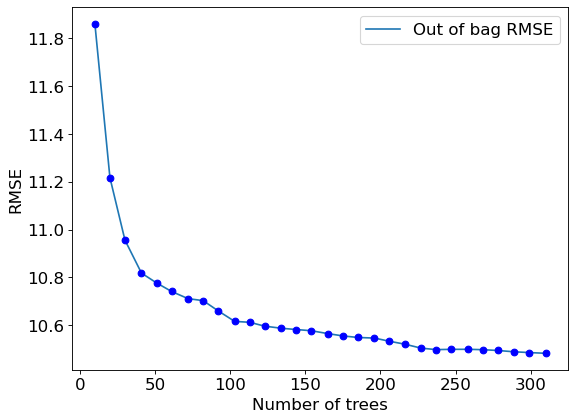

In [21]:
oob_rsquared={};test_rsquared={};oob_rmse={};test_rmse = {}
for i in np.linspace(10, 310, 30,dtype=int):
    model = RandomForestRegressor(n_estimators=i, random_state=1,max_features="sqrt",
                        n_jobs=-1,oob_score=True).fit(X_train, y_train)
    oob_rsquared[i]=model.oob_score_  
    oob_rmse[i]=np.sqrt(mean_squared_error(model.oob_prediction_,y_train))
    
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(oob_rmse.keys(),oob_rmse.values(),label = 'Out of bag RMSE')
plt.plot(oob_rmse.keys(),oob_rmse.values(),'o',color = 'blue')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.legend()

In [30]:
#Tuning only n_estimators and max_features produces similar results
params = {'n_estimators': [19, 20, 21, 22, 23],
          'max_features': [3, 4, 5]}
param_list=list(it.product(*(params[Name] for Name in params)))
oob_score = [0]*len(param_list)
i=0
for pr in param_list:
    model = RandomForestRegressor(random_state=1,oob_score=True,verbose=False,n_estimators = pr[0],
                                 max_features=pr[1],n_jobs=-1).fit(X_train, y_train)
    oob_score[i] = model.oob_score_
    i=i+1
    
print("Best params = ", param_list[np.argmax(oob_score)])
print("Best score (R-squared) = ", np.max(oob_score))

Best params =  (23, 4)
Best score (R-squared) =  0.15047223727247483


In [31]:
model_RF = RandomForestRegressor(n_estimators=23, max_features=4, random_state=1, n_jobs=-1).fit(X_train, y_train)

## XGBoost

>4 10.820 (0.595)
>5 10.695 (0.540)
>6 10.687 (0.476)
>7 10.677 (0.422)
>8 10.668 (0.400)
>9 10.669 (0.396)
>10 10.712 (0.396)


Text(0.5, 0, 'Number of trees')

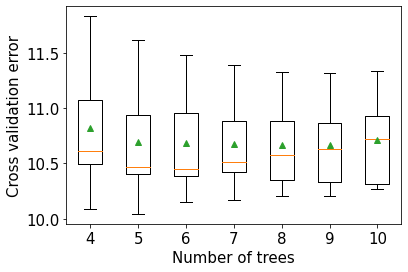

In [33]:
def get_models():
    models = dict()
    n_trees = [4, 5, 6, 7, 8, 9, 10]
    for n in n_trees:
        models[str(n)] = xgb.XGBRegressor(n_estimators=n,random_state=1)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Number of trees',fontsize=15)

>1 10.396 (1.133)
>3 10.751 (1.065)
>5 11.181 (0.885)
>7 11.247 (1.037)
>9 11.409 (0.987)
>11 11.363 (0.951)
>13 11.383 (0.929)
>15 11.389 (0.944)
>17 11.452 (1.004)
>19 11.430 (0.957)


Text(0.5, 0, 'Depth of each tree')

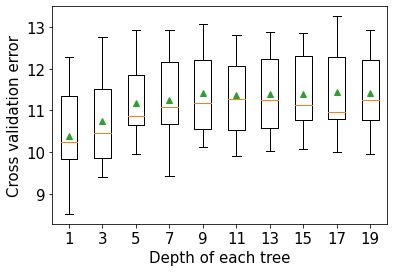

In [35]:
def get_models():
    models = dict()
    for i in range(1,21,2):
        models[str(i)] = xgb.XGBRegressor(random_state=1,max_depth=i)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))
    
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Depth of each tree',fontsize=15)

>0.0100 10.9 (1.6)
>0.0150 10.5 (1.4)
>0.0200 10.4 (1.3)
>0.0250 10.4 (1.1)
>0.0300 10.5 (1.1)
>0.0350 10.5 (1.1)
>0.0400 10.5 (1.1)


Text(0.5, 0, 'Learning rate')

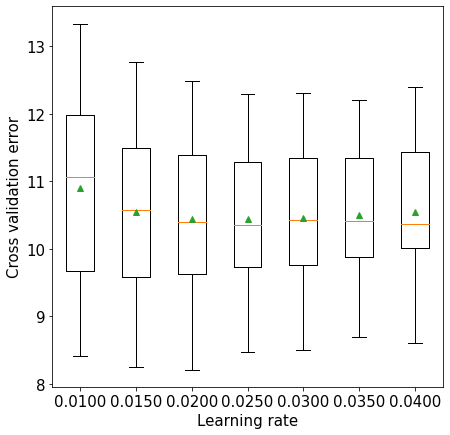

In [36]:
def get_models():
    models = dict()
    for i in [0.010, 0.015, 0.020, 0.025, 0.030, 0.035, 0.040]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(learning_rate=i,random_state=1)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))
    
plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('Learning rate',fontsize=15)

>0.0100 11.5 (0.9)
>0.1000 11.6 (0.9)
>0.2500 11.3 (0.9)
>0.5000 11.2 (1.0)
>1.0000 11.2 (0.9)


Text(0.5, 0, 'reg_lambda')

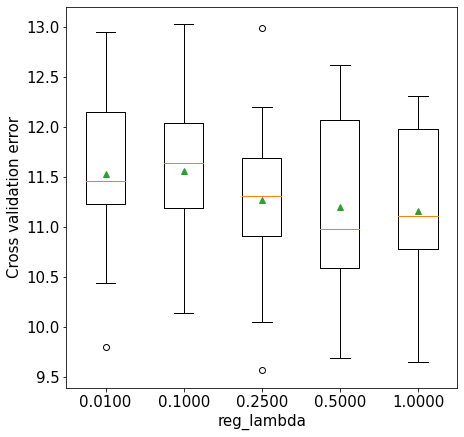

In [41]:
def get_models():
    models = dict()
    for i in [0.01, 0.1, 0.25, 0.5, 1]:
        key = '%.4f' % i
        models[key] = xgb.XGBRegressor(reg_lambda=i,random_state=1)
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    scores = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1))
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.1f (%.1f)' % (name, np.mean(scores), np.std(scores)))

plt.figure(figsize=(7, 7))
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Cross validation error',fontsize=15)
plt.xlabel('reg_lambda',fontsize=15)

In [44]:
param_grid = {'n_estimators':[5, 6, 7],
              'max_depth': [2, 3, 4, 5],
              'learning_rate': [0.2, 0.21, 0.22, 0.23, 0.24],
              'reg_lambda':[0.1, 0.15, 0.2]}

cv = KFold(n_splits=5,shuffle=True,random_state=1)
optimal_params = GridSearchCV(estimator=xgb.XGBRegressor(random_state=1),                                                       
                             param_grid = param_grid,                             
                             verbose = 1,
                             n_jobs=-1,
                             cv = cv)
optimal_params.fit(X_train , y_train)
print("Optimal parameter values =", optimal_params.best_params_)
print("Optimal cross validation R-squared = ",optimal_params.best_score_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Optimal parameter values = {'learning_rate': 0.24, 'max_depth': 4, 'n_estimators': 7, 'reg_lambda': 0.15}
Optimal cross validation R-squared =  0.2423054116636579


In [45]:
model_XG = xgb.XGBRegressor(random_state=1, max_depth=4, n_estimators=7, learning_rate = 0.24, reg_lambda=0.15).fit(X_train, y_train)

## Ensemble

In [57]:
model_ensemble= StackingRegressor(estimators = [('ADA', model_ADA),
                                                ('RF', model_RF),
                                                ('XG', model_XG)],
                      final_estimator = LassoCV(),
                      cv = KFold(n_splits = 5, shuffle = True, random_state=1))
model_ensemble.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                  estimators=[('ADA',
                               AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                                                 n_estimators=4,
                                                 random_state=1)),
                              ('RF',
                               RandomForestRegressor(max_features=4,
                                                     n_estimators=23, n_jobs=-1,
                                                     random_state=1)),
                              ('XG',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            callbacks=None, colsample_by...
                                            gpu_id=-1, grow_policy='depthwise',
                                            importance_type=None,
                                            interaction_constrain

In [58]:
model_ensemble.final_estimator_.coef_

array([0.22639398, 0.23771084, 0.62026887])

In [56]:
pred6 = model_ensemble.predict(X_test)

pred_v6 = pd.DataFrame(index=range(X_test.shape[0]), columns=range(2))
pred_v6.columns = ['id', 'y']
pred_v6['id'] = col_id
pred_v6['y'] = pred6
pred_v6

pred_v6.to_csv('pred_v6.csv', index=True)